# Combining And Merging DataSets

You’d have probably encountered multiple data tables that have various bits of information that you would like to see all in one place — one dataframe in this case.
And this is where the power of **merge** comes in to efficiently combine multiple data tables together in a nice and orderly fashion into a single dataframe for further analysis.

“Merging” two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns.

The words “merge” and “join” are used relatively interchangeably in Pandas and other languages. Despite the fact that Pandas has both “merge” and “join” functions, essentially they both do the similar things.

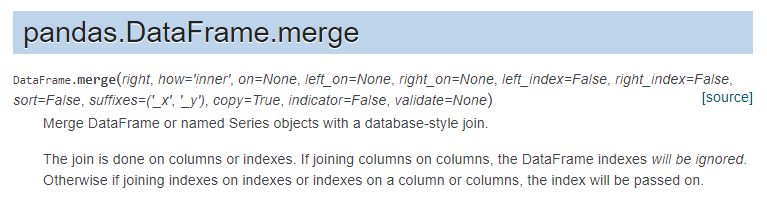

To understand pd.merge, let’s start with a simple line of code as below. What this line of code does is to merge two dataframes — left_dfand right_df — into one based on their values with the samecolumn_name available in both dataframes. With the how='inner', this will perform inner merge to only combine values in the column_name that match.


    pd.merge(left_df, right_df, on='column_name', how='inner'

Since the method how has different parameters (by default Pandas uses inner), we’ll look into different parameters (left, right, inner, outer) and their use cases.

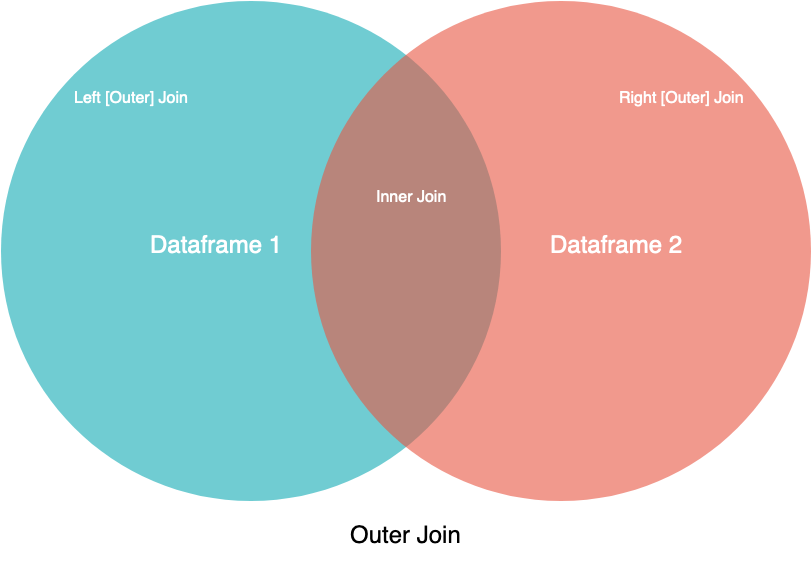

# Excercise1:
Let’s first understand the data sets used with the following explanation on each dataframe.

user_usage — A first dataset containing users monthly mobile usage statistics

user_device — A second dataset containing details of an individual “use” of the system, with dates and device information

android_device — A third dataset with device and manufacturer data, which lists all Android devices and their model code

In [ ]:
import pandas as pd
user_usage=pd.read_csv('https://drive.google.com/uc?id=1KvRY7-b3Qi4QZtX9zTMusjbaATMdXOQE')


In [ ]:
user_device=

In [ ]:
android_device=

## 1.LEFT Merge
Keep every row in the left dataframe. Where there are missing values of the “on” variable in the right dataframe, add empty / NaN values in the result.




In [ ]:
left_merge = pd.merge(user_usage,user_device,on='use_id',how='left')
left_merge.head()

In [ ]:
left_merge.tail()

With the operation above, left_merge has the same size as user_usage as we keep all the rows in the left dataframe using the left parameter for the method how .

## 2.RIGHT Merge
To perform the right merge, we just repeat the code above by simply changing the parameter of how from left to right.


In [ ]:
right_merge = pd.merge(user_usage,user_device,on='use_id',how='right')
right_merge.head()

In [ ]:
right_merge.tail()

With the operation above, left_merge has the same size as user_usage as we keep all the rows in the left dataframe using the left parameter for the method how .

## 3.INNER Merge
Pandas uses “inner” merge by default. This keeps only the common values in both the left and right dataframes for the merged data.
In our case, only the rows that contain use_id values that are common between user_usage and user_device remain in the merged data — inner_merge

In [ ]:
inner_merge = pd.merge(user_usage,user_device,on='use_id',how='inner')
inner_merge.head()

## 4.OUTER Merge
Finally, we have “outer” merge.
The “outer” merge combines all the rows for left and right dataframes with NaN when there are no matched values in the rows.

In [ ]:
outer_merge = pd.merge(user_usage,user_device,on='use_id',how='outer',indicator=True)


In [ ]:
outer_merge.iloc[[0,1,200,201,350,351]]

## 5.Merge Dataframes with Different Column Names

The method on only works for the same column name in the left and right dataframes.
Therefore, we use left_on and right_on to replace the method on as shown below.

In [ ]:
left_merge=pd.merge(user_device, android_device,left_on='device',right_on='Model',how='left',indicator=True)
left_merge.head()

# EXCERCISE2:
QUES1:
Rank US states and territories by their 2010 population density.

**SOLN:**

We'll start with a many-to-one merge that will give us the full state name within the population DataFrame. We want to merge based on the state/region column of pop, and the abbreviation column of abbrevs. We'll use how='outer' to make sure no data is thrown away due to mismatched labels.

Let's take a look at the three datasets, using the Pandas read_csv() function:

In [ ]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

In [ ]:
#double-check whether there were any mismatches here

merged.isnull().any()

Some of the population info is null; let's figure out which these are!

More importantly, we see also that some of the new state entries are also null, which means that there was no corresponding entry in the abbrevs key! Let's figure out which regions lack this match:

In [ ]:
merged[merged['population'].isnull()].head()

In [ ]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

We can quickly infer the issue: our population data includes entries for Puerto Rico (PR) and the United States as a whole (USA), while these entries do not appear in the state abbreviation key. We can fix these quickly by filling in appropriate entries:

In [ ]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

No more nulls in the state column: we're all set!

Now we can merge the result with the area data using a similar procedure. Examining our results, we will want to join on the state column in both:

In [ ]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

In [ ]:
#let's check for nulls to see if there were any mismatches:

final.isnull().any()

In [ ]:
# nulls in the area column; we can take a look to see which regions were ignored here:

final['state'][final['area (sq. mi)'].isnull()].unique()

In [ ]:
final.dropna(inplace=True)
final.head()

Now we have all the data we need. To answer the question of interest, let's first select the portion of the data corresponding with the year 2000, and the total population. We'll use the query() function to do this quickly (this requires the numexpr package to be installed; see High-Performance Pandas: eval() and query()):

In [ ]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

Now let's compute the population density and display it in order. We'll start by re-indexing our data on the state, and then compute the result

In [ ]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)'

In [ ]:
density.sort_values(ascending=False, inplace=True)
density.head()

The result is a ranking of US states plus Washington, DC, and Puerto Rico in order of their 2010 population density, in residents per square mile. We can see that by far the densest region in this dataset is Washington, DC (i.e., the District of Columbia); among states, the densest is New Jersey

In [ ]:
density.tail()

QUES-Rank Rank US states and territories by their area(sq. mi)

# EXCERCISE3:


In [ ]:
import pandas as pd
climate_temp = pd.read_csv("https://drive.google.com/uc?id=1oskv3vdUkjmJPlo-Z_OLHoDQtwmtjlZH")
climate_precip = pd.read_csv("https://drive.google.com/uc?id=1FSnLwEJC_t8ML18CTseMNjRo5pwtddaD")

In [ ]:
climate_temp.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,0,0,0,-7777,-7777,2,5,7,10,15


In [ ]:
climate_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,...,3,0,0,0,0,0,0,0,0,0


Let us take a quick look at the dimensions of the two DataFrames:

In [ ]:
climate_temp.shape

(127020, 21)

In [ ]:
climate_precip.shape

(151110, 29)

## 1.Inner Join

With the two datasets loaded into DataFrame objects, you’ll select a small slice of the precipitation dataset, and then use a plain merge() call to do an inner join. This will result in a smaller, more focused dataset:

In [ ]:
precip_one_station = climate_precip[climate_precip["STATION"] == "GHCND:USC00045721"]
precip_one_station.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,9,6,0,-9999,-9999
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,11,4,0,3,3,10,6,0,-9999,-9999
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,3,10,6,0,-9999,-9999
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,11,4,0,3,2,10,6,0,-9999,-9999
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,11,4,0,3,2,10,6,0,-9999,-9999


Here you have created a new DataFrame called precip_one_station from the climate_precip DataFrame, selecting only rows in which the STATION field is "GHCND:USC00045721".

In [ ]:
inner_merged = pd.merge(precip_one_station, climate_temp)
inner_merged.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19


###Ques-
Merge both entire datasets, but only on Station and Date since the combination of the two will yield a unique value for each row

In [ ]:
inner_merged_total = pd.merge(climate_temp, climate_precip, on=["STATION", "DATE"])
inner_merged_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0


In [ ]:
inner_merged_total.shape

(123005, 48)

### Q-Why 48 columns instead of 47?

**ANS**- Because you specified the key columns to join on, Pandas doesn’t try to merge all mergeable columns. This can result in “duplicate” column names, which may or may not have different values.



## 2.Outer Join

If a row doesn’t have a match in the other DataFrame (based on the key column[s]), then you won’t lose the row like you would with an inner join. Instead, the row will be in the merged DataFrame with NaN values filled in where appropriate.

In [ ]:
outer_merged = pd.merge(precip_one_station, climate_temp, how="outer", on=["STATION", "DATE"])
outer_merged.head()
outer_merged.shape

## 3.Left Join

Using a left outer join will leave your new merged DataFrame with all rows from the left DataFrame, while discarding rows from the right DataFrame that don’t have a match in the key column of the left DataFrame

In [ ]:
left_merged = pd.merge(climate_temp, precip_one_station,
                        how="left", on=["STATION", "DATE"])
left_merged.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To prove that this only holds for the left DataFrame, run the same code, but change the position of precip_one_station and climate_temp:

In [ ]:
left_merged_reversed = pd.merge(precip_one_station, climate_temp, how="left", on=["STATION", "DATE"])
left_merged_reversed.head()


,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,12,14,19
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,...,0,0,0,1,3,6,10,11,14,19
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,...,0,0,0,1,2,5,9,11,14,19
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,...,0,0,0,1,2,5,9,11,14,19


## 4.Right Join



In [ ]:
right_merged = pd.merge(precip_one_station, climate_temp, how="right", on=["STATION", "DATE"])
right_merged.head()

# Exercise4:
DataFrames Concatenation

concat() function does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes.

Write a Pandas program to join the two given dataframes along rows and assign all data.

Data:


```
student_data1:
  student_id              name  marks
0         S1  Danniella Fenton    200
1         S2      Ryder Storey    210
2         S3      Bryce Jensen    190
3         S4         Ed Bernal    222
4         S5       Kwame Morin    199
```


```
student_data2:
  student_id              name  marks
0         S4  Scarlette Fisher    201
1         S5  Carla Williamson    200
2         S6       Dante Morse    198
3         S7    Kaiser William    219
4         S8   Madeeha Preston    201
```




In [ ]:
import pandas as pd

# Creating first dataframe
student_data1 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
         'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Ed Bernal', 'Kwame Morin'], 
        'marks': [200, 210, 190, 222, 199]})

# Creating second dataframe
student_data2 = pd.DataFrame({
        'student_id': ['S4', 'S5', 'S6', 'S7', 'S8'],
        'name': ['Scarlette Fisher', 'Carla Williamson', 'Dante Morse', 'Kaiser William', 'Madeeha Preston'], 
        'marks': [201, 200, 198, 219, 201]})

Solution: Use concat function of Pandas to concatenate dataframes.

In [ ]:
# Concatenating the dataframes
pd.concat([student_data1, student_data2],ignore_index=True )

#Exercise5: Concatenate Pandas DataFrames Without Duplicates
In order to perform concatenation of two dataframes, we are going to use the pandas.concat().drop_duplicates() method in pandas module.

Step-by-step Approach: 

*   Import module.
*   Load two sample dataframes as variables.
*   Concatenate the dataframes using pandas.concat().drop_duplicates() method.
*   Display the new dataframe generated.

Write a Pandas program to join the two given dataframes along rows and assign all data.


```
# student_data1:
  student_id              name  marks
0         S1  Danniella Fenton    200
1         S2      Ryder Storey    210
2         S3      Bryce Jensen    190
3         S4  Scarlette Fisher    201
4         S5  Carla Williamson    200
```


```
# student_data2:
  student_id              name  marks
0         S4  Scarlette Fisher    201
1         S5  Carla Williamson    200
2         S6       Dante Morse    198
3         S7    Kaiser William    219
4         S8   Madeeha Preston    201
```







In [ ]:
import pandas as pd

# Creating first dataframe
student_data1 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
         'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Scarlette Fisher', 'Carla Williamson'], 
        'marks': [200, 210, 190, 201, 200]})

# Creating second dataframe
student_data2 = pd.DataFrame({
        'student_id': ['S4', 'S5', 'S6', 'S7', 'S8'],
        'name': ['Scarlette Fisher', 'Carla Williamson', 'Dante Morse', 'Kaiser William', 'Madeeha Preston'], 
        'marks': [201, 200, 198, 219, 201]})

In [ ]:
# Concatenating two dataframes without duplicates
new_dataframe = pd.concat([student_data1, student_data2]).drop_duplicates()

In [ ]:
# Display dataframe generated
new_dataframe

**How to fix indexing of the generated dataFrame?**


In [ ]:
# Resetting index
new_dataframe = new_dataframe.reset_index(drop=True)

In [ ]:
# Display dataframe generated
new_dataframe